In [12]:
import numpy as np
import skfuzzy as fuzz
import gymnasium as gym
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

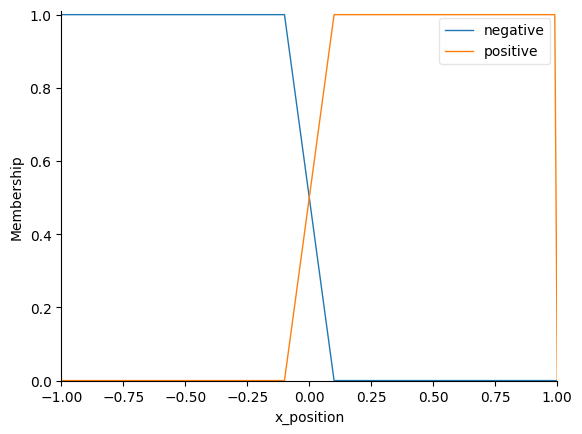

In [13]:
x_position = ctrl.Antecedent(np.arange(-1.0, 1.01, 0.01), 'x_position')

x_position['negative'] = fuzz.trapmf(x_position.universe, [-1.0, -1.0, -0.1, 0.1])
x_position['positive'] = fuzz.trapmf(x_position.universe, [-0.1, 0.1, 1.0, 1.0])

x_position.view()


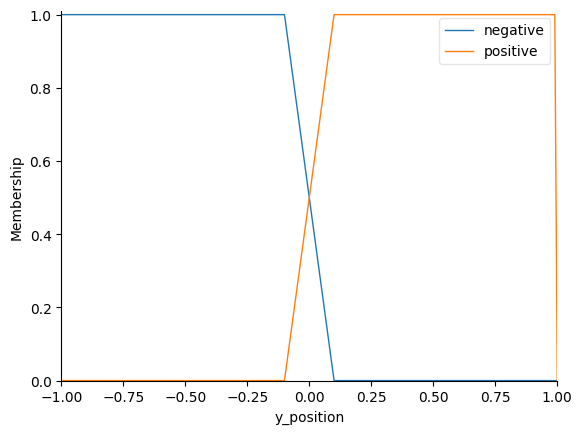

In [14]:
y_position = ctrl.Antecedent(np.arange(-1.0, 1.01, 0.01), 'y_position')

y_position['negative'] = fuzz.trapmf(y_position.universe, [-1.0, -1.0, -0.1, 0.1])
y_position['positive'] = fuzz.trapmf(y_position.universe, [-0.1, 0.1, 1.0, 1.0])

y_position.view()


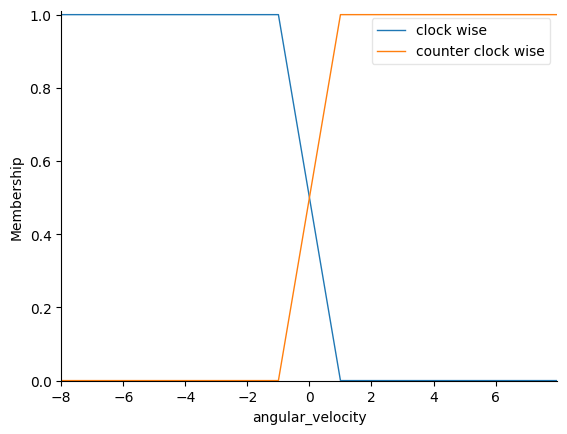

In [15]:
angular_velocity = ctrl.Antecedent(np.arange(-8.0, 8.0, 0.01), 'angular_velocity')

angular_velocity['clock wise'] = fuzz.trapmf(angular_velocity.universe, [-8.0, -8.0, -1.0, 1.0])
angular_velocity['counter clock wise'] = fuzz.trapmf(angular_velocity.universe, [-1.0, 1.0, 8.0, 8.0])

angular_velocity.view()

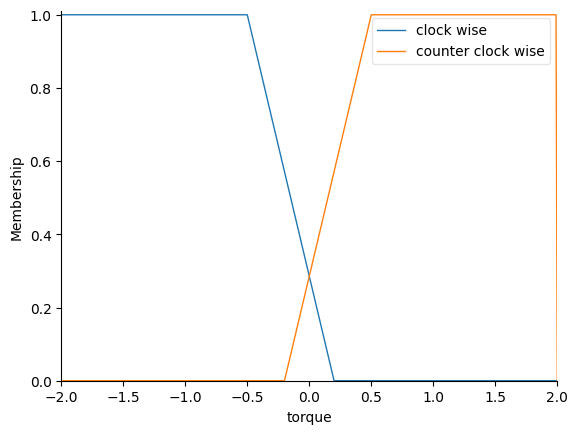

In [16]:
torque = ctrl.Consequent(np.arange(-2.0, 2.01, 0.01), 'torque')

torque['clock wise'] = fuzz.trapmf(torque.universe, [-2.0, -2.0,-0.5, 0.2])
torque['counter clock wise'] = fuzz.trapmf(torque.universe, [-0.2, 0.5, 2.0,2.0])

torque.view()

In [17]:

## method1 = main method
# rule1 = ctrl.Rule(x_position['negative'] & y_position['negative'] & angular_velocity['clock wise'], torque['clock wise'])
# rule2 = ctrl.Rule(x_position['negative'] & y_position['negative'] & angular_velocity['counter clock wise'], torque['counter clock wise'])
# rule3 = ctrl.Rule(x_position['negative'] & y_position['positive'] & angular_velocity['clock wise'], torque['clock wise'])
# rule4 = ctrl.Rule(x_position['negative'] & y_position['positive'] & angular_velocity['counter clock wise'], torque['counter clock wise'])
# rule5 = ctrl.Rule(x_position['positive'] & y_position['negative'] & angular_velocity['clock wise'], torque['counter clock wise'])
# rule6 = ctrl.Rule(x_position['positive'] & y_position['negative'] & angular_velocity['counter clock wise'], torque['clock wise'])
# rule7 = ctrl.Rule(x_position['positive'] & y_position['positive'] & angular_velocity['clock wise'], torque['counter clock wise'])
# rule8 = ctrl.Rule(x_position['positive'] & y_position['positive'] & angular_velocity['counter clock wise'], torque['clock wise'])

## method2
rule1 = ctrl.Rule(x_position['negative'] & angular_velocity['clock wise'], torque['clock wise'])
rule2 = ctrl.Rule(x_position['negative'] & angular_velocity['counter clock wise'], torque['counter clock wise'])
rule3 = ctrl.Rule(x_position['positive'] & angular_velocity['clock wise'], torque['counter clock wise'])
rule4 = ctrl.Rule(x_position['positive'] & angular_velocity['counter clock wise'], torque['clock wise'])




In [18]:
# controller = ctrl.ControlSystem([rule1, rule2,rule3,rule4,rule5,rule6,rule7,rule8])
controller = ctrl.ControlSystem([rule1, rule2,rule3,rule4])
simulator = ctrl.ControlSystemSimulation(controller)

In [19]:
### taking gif of pendulum movement
# import os
# import imageio
# ROOT_DIR = os.path.dirname('.')
# GIF_PATH = os.path.realpath(os.path.join(ROOT_DIR, 'test.gif'))
# gif = []
rewards = []

In [20]:
env = gym.make("Pendulum-v1", render_mode="human")

observation, _ = env.reset()
for i in range(500):
    simulator.input['x_position'] = observation[0]
    # simulator.input['y_position'] = observation[1]
    simulator.input['angular_velocity'] = observation[2]
    
    simulator.compute()
    decision = simulator.output['torque']
    
    observation, reward, terminated, _, _ = env.step([decision])
    print(f"iteration {i} :  ","x :",observation[0],"y : :",observation[1],"velocity : ",observation[2],"torque : ",decision)
    
    rewards.append(reward)
    # Check termination condition
    if observation[0] > 0.99 and abs(observation[2]) < 1.5:
        terminated = True
    
    frame = env.render()
    # if frame.ndim == 2:
    #     # Convert grayscale to RGB
    #     frame = np.repeat(frame[:, :, np.newaxis], 3, axis=2)
    # gif.append(frame)
    
    if terminated:
        print(f'You Win in {i} iteration!')
        break

env.close()


iteration 0 :   x : -0.7383575 y : : 0.6744095 velocity :  -0.4329388 torque :  -0.8412857313820445
iteration 1 :   x : -0.7385658 y : : 0.6741814 velocity :  0.0061782524 torque :  -0.44460054383662134
iteration 2 :   x : -0.75559926 y : : 0.6550342 velocity :  0.5125586 torque :  0.004961967213120319
iteration 3 :   x : -0.78993833 y : : 0.6131863 velocity :  1.0827992 torque :  0.5264333394385419
iteration 4 :   x : -0.83919626 y : : 0.5438286 velocity :  1.7019044 torque :  1.0614363143631456
iteration 5 :   x : -0.8953664 y : : 0.44533026 velocity :  2.2689912 torque :  1.0614363143631456
iteration 6 :   x : -0.94815 y : : 0.31782332 velocity :  2.7622044 torque :  1.0614363143631456
iteration 7 :   x : -0.9863454 y : : 0.1646898 velocity :  3.1597874 torque :  1.0614363143631456
iteration 8 :   x : -0.99997765 y : : -0.006682453 velocity :  3.4425201 torque :  1.0614363143631456
iteration 9 :   x : -0.98265576 y : : -0.1854391 velocity :  3.5967238 torque :  1.0614363143631456
it

In [21]:
len(rewards)


119

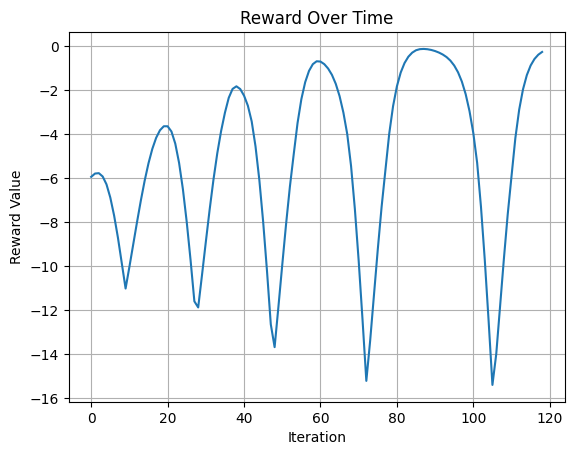

In [22]:
plt.plot(rewards)
plt.title('Reward Over Time')
plt.xlabel('Iteration')
plt.ylabel('Reward Value')
plt.grid(True)
plt.show()